In [1]:
import pandas as pd
import pickle5 as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.nonparametric.smoothers_lowess import lowess
from loess.loess_1d import loess_1d
# _root_path = '/content/drive/MyDrive/PoliticalSentimentAnalysis/'
_root_path = '../'

# load data
with open(_root_path + 'data/tweets.pkl', 'rb') as f:
    tweets_df = pickle.load(f)

# Get all tweets from 2019
tweets_df.sort_values(by='Date', inplace=True)

emotions = ['Anger', 'Anticipation', 'Joy', 'Trust', 'Fear','Surprise', 'Sadness', 'Disgust', 'Neutral']

# set default params
plt.rcParams["figure.figsize"] = (8, 5)
plt.rc('font', size=12)

# Rename party for clearer plots and set party color
tweets_df.Party = tweets_df.Party.apply(lambda p: 'Republican' if p == 'R' else 'Democratic')
party_colors = dict(
    D='tab:blue',
    Democratic='tab:blue',
    R='tab:red',
    Republican='tab:red',
)

# Time Series


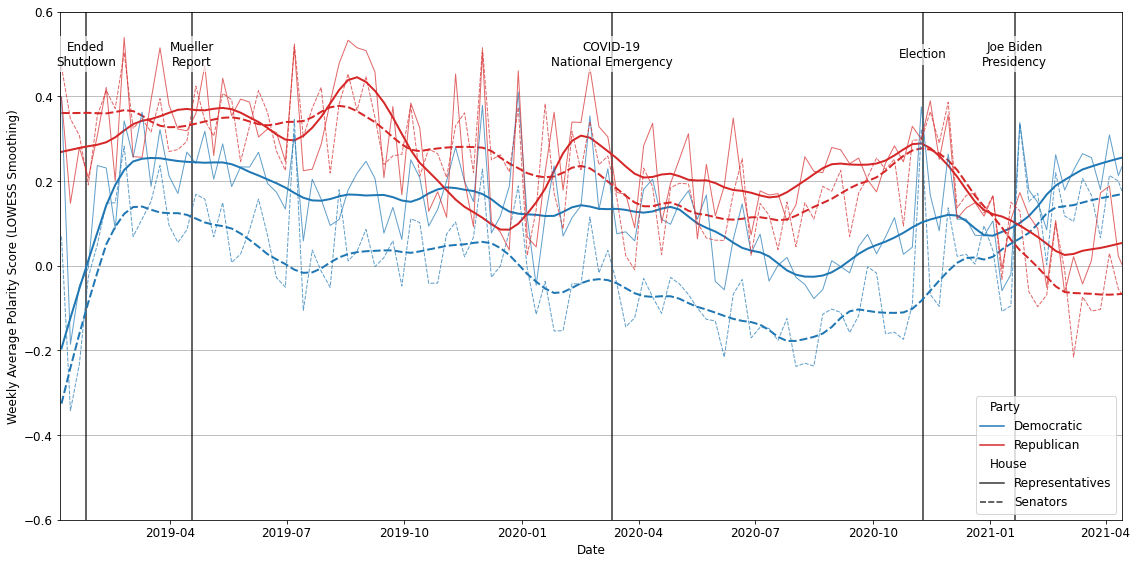

In [3]:
df = tweets_df[['Date', 'Party', 'House', 'Polarity']]
df = df[df.Date > datetime.datetime(2019,1,1)]
df.set_index('Date', inplace=True)
df = df.groupby(['Party', 'House', pd.Grouper(freq='W')])['Polarity'].mean()
df = df.to_frame().reset_index()

# LOWESS Smoothing
smoothing = list()
for i, group in df.groupby(['Party', 'House']):
    smoothing.extend(lowess(group.Polarity.values, group.Date.values, frac=1/10, return_sorted=False))
df['LOWESS'] = smoothing

fig = plt.figure(figsize=(16,8))
plt.gca().yaxis.grid(True)

for date, event in (('2019-01-25', 'Ended\nShutdown'),
                    ('2019-04-18', 'Mueller\nReport'),
                    ('2020-03-11', 'COVID-19\nNational Emergency'),
                    ('2020-11-09', 'Election'),
                    ('2021-01-20', 'Joe Biden\nPresidency'),
                    ):
    date = datetime.datetime.strptime(f'{date} 00:00:00', '%Y-%m-%d %H:%M:%S')
    plt.axvline(date, 0, 1, color='black', alpha=0.8)
    plt.text(date, 0.5, event, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'), ha='center', va='center')

sns.lineplot(data=df, x='Date', y='LOWESS', hue='Party', style='House', palette=party_colors, linewidth = 2)
sns.lineplot(data=df, x='Date', y='Polarity', hue='Party', style='House', palette=party_colors, linewidth = 1, alpha=0.7, legend=False)

plt.xlim([datetime.date(2019,1,5), datetime.date(2021,4,14)])
plt.ylim((-0.6,0.6))
plt.ylabel('Weekly Average Polarity Score (LOWESS Smoothing)')
plt.tight_layout()
plt.savefig(_root_path + 'output/figures/timeline_polarity.png')
plt.show()


In [5]:
# Average yearly polarity
df = tweets_df[['Date', 'Party', 'House', 'Polarity']]
df.set_index('Date', inplace=True)
df = df.groupby(['Party', pd.Grouper(freq='Y')])['Polarity'].mean()
df

Party       Date      
Democratic  2009-12-31    0.308605
            2010-12-31    0.339861
            2011-12-31    0.378698
            2012-12-31    0.477282
            2013-12-31    0.391048
            2014-12-31    0.446690
            2015-12-31    0.439077
            2016-12-31    0.399274
            2017-12-31    0.132112
            2018-12-31    0.121101
            2019-12-31    0.157520
            2020-12-31    0.039842
            2021-12-31    0.172971
Republican  2009-12-31    0.296744
            2010-12-31    0.226280
            2011-12-31    0.313872
            2012-12-31    0.310151
            2013-12-31    0.294648
            2014-12-31    0.395275
            2015-12-31    0.386121
            2016-12-31    0.430477
            2017-12-31    0.463804
            2018-12-31    0.425963
            2019-12-31    0.306052
            2020-12-31    0.200590
            2021-12-31    0.031207
Name: Polarity, dtype: float64